In [12]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [13]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'

# 分類数設定

In [14]:
NUM_CLASSES = 8

# 学習データ読み込み

In [15]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [16]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [18]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [19]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_2 (Dropout)         (None, 42)                0         
                                                                 
 dense_3 (Dense)             (None, 20)                860       
                                                                 
 dropout_3 (Dropout)         (None, 20)                0         
                                                                 
 dense_4 (Dense)             (None, 10)                210       
                                                                 
 dense_5 (Dense)             (None, 8)                 88        
                                                                 
Total params: 1158 (4.52 KB)
Trainable params: 1158 (4.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [21]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [22]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
25/31 [=======================>......] - ETA: 0s - loss: 1.8636 - accuracy: 0.2991 
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
31/31 [==============================] - 1s 17ms/step - loss: 1.8443 - accuracy: 0.3026 - val_loss: 1.6938 - val_accuracy: 0.4068
Epoch 2/1000
28/31 [==========================>...] - ETA: 0s - loss: 1.6958 - accuracy: 0.3211
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
31/31 [==============================] - 0s 4ms/step - loss: 1.6888 - accuracy: 0.3216 - val_loss: 1.5589 - val_accuracy: 0.4076
Epoch 3/1000
 1/31 [..............................] - ETA: 0s - loss: 1.5386 - accuracy: 0.3906

/usr/local/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


24/31 [======================>.......] - ETA: 0s - loss: 1.5841 - accuracy: 0.3408
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
31/31 [==============================] - 0s 5ms/step - loss: 1.5741 - accuracy: 0.3416 - val_loss: 1.4597 - val_accuracy: 0.4006
Epoch 4/1000
22/31 [====================>.........] - ETA: 0s - loss: 1.5046 - accuracy: 0.3796
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
31/31 [==============================] - 0s 4ms/step - loss: 1.4823 - accuracy: 0.3827 - val_loss: 1.3821 - val_accuracy: 0.4114
Epoch 5/1000
 1/31 [..............................] - ETA: 0s - loss: 1.4373 - accuracy: 0.3984
Epoch 5: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
31/31 [==============================] - 0s 3ms/step - loss: 1.4305 - accuracy: 0.3904 - val_loss: 1.3264 - val_accuracy: 0.4800
Epoch 6/1000
 1/31 [..............................] - ETA: 0s - loss: 1.2575 - accuracy: 0.5234
Epoch 6: savin

In [23]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

11/11 [==============================] - 0s 3ms/step - loss: 0.3562 - accuracy: 0.8914


In [24]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [25]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 86ms/step
[3.2978803e-02 5.3568095e-01 3.0643073e-01 6.1776856e-04 3.6402198e-03
 2.2939004e-02 2.1846443e-05 9.7690716e-02]
1


# 混同行列

41/41 [==============================] - 0s 1ms/step


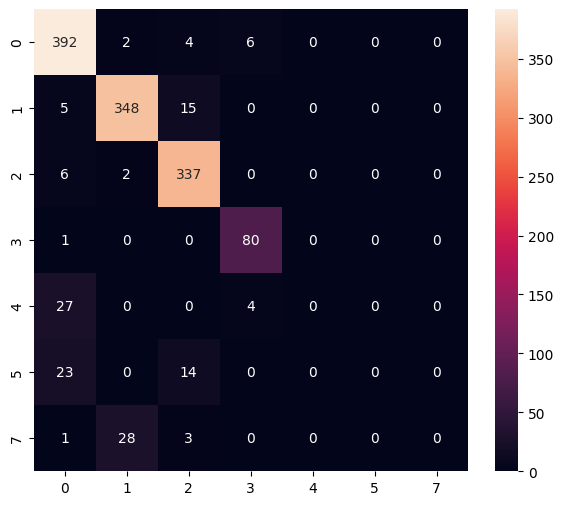

Classification Report
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       404
           1       0.92      0.95      0.93       368
           2       0.90      0.98      0.94       345
           3       0.89      0.99      0.94        81
           4       0.00      0.00      0.00        31
           5       0.00      0.00      0.00        37
           7       0.00      0.00      0.00        32

    accuracy                           0.89      1298
   macro avg       0.51      0.55      0.53      1298
weighted avg       0.82      0.89      0.86      1298



/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [27]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

/usr/local/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [28]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /var/folders/np/ty5qpsqj18z442jqjj2z4b2c0000gn/T/tmpjo_6d566/assets


INFO:tensorflow:Assets written to: /var/folders/np/ty5qpsqj18z442jqjj2z4b2c0000gn/T/tmpjo_6d566/assets
2023-10-24 19:30:32.468405: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:378] Ignored output_format.
2023-10-24 19:30:32.468585: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:381] Ignored drop_control_dependency.
2023-10-24 19:30:32.470368: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /var/folders/np/ty5qpsqj18z442jqjj2z4b2c0000gn/T/tmpjo_6d566
2023-10-24 19:30:32.471968: I tensorflow/cc/saved_model/reader.cc:51] Reading meta graph with tags { serve }
2023-10-24 19:30:32.471984: I tensorflow/cc/saved_model/reader.cc:146] Reading SavedModel debug info (if present) from: /var/folders/np/ty5qpsqj18z442jqjj2z4b2c0000gn/T/tmpjo_6d566
2023-10-24 19:30:32.477016: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:382] MLIR V1 optimization pass is not enabled
2023-10-24 19:30:32.478079: I tensorflow/cc/saved_model/load

6748

# 推論テスト

In [29]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [30]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [31]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [32]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 877 µs, sys: 1.38 ms, total: 2.25 ms
Wall time: 1.58 ms


In [33]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[3.2978807e-02 5.3568065e-01 3.0643106e-01 6.1776728e-04 3.6402175e-03
 2.2939034e-02 2.1846432e-05 9.7690649e-02]
1
